# calculate betweenness centrality


In [2]:
import pandas as pd
import numpy as np
import csv
import ast
import matplotlib.pyplot as plt
import bct

In [10]:
gs_csv = "gs_outputs/gs_authorlist_updated1.csv"
scival_csv = "scival_outputs/sv_authorlist_publications_updated1.csv"

In [11]:
gs_df = pd.read_csv(gs_csv)
scival_df = pd.read_csv(scival_csv)

In [12]:
print(gs_df.head)
print(scival_df.head)

<bound method NDFrame.head of                             Name    Scholar ID  Document Count  Cited by  \
0                  Tim H. Murphy  qJjM8hkAAAAJ             237     21192   
1            Annie Vogel Ciernia  XAGfOIIAAAAJ              44      1975   
2                 Brian MacVicar  Sx3420cAAAAJ             218     22220   
3           Fidel Vila-Rodriguez  VynxFpEAAAAJ             264      5713   
4                  Shernaz Bamji  C832lNEAAAAJ              61      5327   
5                      Lara Boyd  yutn3mwAAAAJ             357     15164   
6                  Paul Pavlidis  ataejQQAAAAJ             245     17691   
7              Martin J. McKeown  cBAT2tQAAAAJ             369     16514   
8   A Jon Stoessl OR jon Stoessl  KnhWIqwAAAAJ             449     30804   
9                  Peter Cripton  hm6fJTkAAAAJ             284      7717   
10               Jason S. Snyder  B6Fe4-4AAAAJ              39      6042   
11              Wolfram Tetzlaff  HgUvr-IAAAAJ            

In [13]:
def get_coauthor_matrix(df):
    names = df.loc[:,"Name"]
    coauthor_matrix = np.zeros((names.size, names.size))

    for idx, author in df.iterrows():
        auth_name = author["Name"]
        row = names[names == auth_name].index[0]
        try:
            coauthors = ast.literal_eval(author["Coauthors"]) #get coauthors
            if len(coauthors) == 0: print(auth_name, "has no coauthors")
            for coauthor in coauthors.keys():
                num_publications = coauthors[coauthor]
                col = names[names == coauthor].index[0]
                coauthor_matrix[col][row] += num_publications

        except:
            print(auth_name, "has no coauthors")
    
    print("\n")
    return coauthor_matrix

In [14]:
scival_coauthor_matrix = get_coauthor_matrix(scival_df)
gs_coauthor_matrix = get_coauthor_matrix(gs_df)

Annie Vogel Ciernia has no coauthors
Mark S. Cembrowski has no coauthors
Michael D. Gordon has no coauthors
Manu S. Madhav has no coauthors
Brian Fisher has no coauthors
Emily Lauren Sylwestrak has no coauthors
Jeffrey M. LeDue has no coauthors
Anthony Randal McIntosh has no coauthors


Michael Gordon has no coauthors
Manu S Madhav has no coauthors
Emily Sylwestrak has no coauthors




In [15]:
print(scival_coauthor_matrix)
print(gs_coauthor_matrix)

print(type(scival_coauthor_matrix))
print(scival_coauthor_matrix.shape)

# scival_2dlist = scival_coauthor_matrix.tolist()
# print(type(scival_2dlist))

[[0. 0. 2. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [2. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 3. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [3. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
<class 'numpy.ndarray'>
(46, 46)


In [16]:
# plt.matshow(scival_coauthor_matrix,cmap="Wistia",norm="linear")
# plt.matshow(gs_coauthor_matrix,cmap="Wistia",norm="linear")
def graph_matrix(df, title):
    coauthor_matrix = get_coauthor_matrix(df)
    names=scival_df["Name"].to_list()

    fig, ax = plt.subplots()
    im = ax.imshow(coauthor_matrix, cmap="YlOrRd")

    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(names)), labels=names, fontsize="xx-small")
    ax.set_yticks(np.arange(len(names)), labels=names, fontsize="xx-small")

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(names)):
        for j in range(len(names)):
            text = ax.text(j, i, int(coauthor_matrix[i, j]),
                        ha="center", va="center", color="black")

    ax.set_title(title)
    fig.tight_layout()
    fig.set_size_inches(10, 10)
    plt.show()

Annie Vogel Ciernia has no coauthors
Mark S. Cembrowski has no coauthors
Michael D. Gordon has no coauthors
Manu S. Madhav has no coauthors
Brian Fisher has no coauthors
Emily Lauren Sylwestrak has no coauthors
Jeffrey M. LeDue has no coauthors
Anthony Randal McIntosh has no coauthors




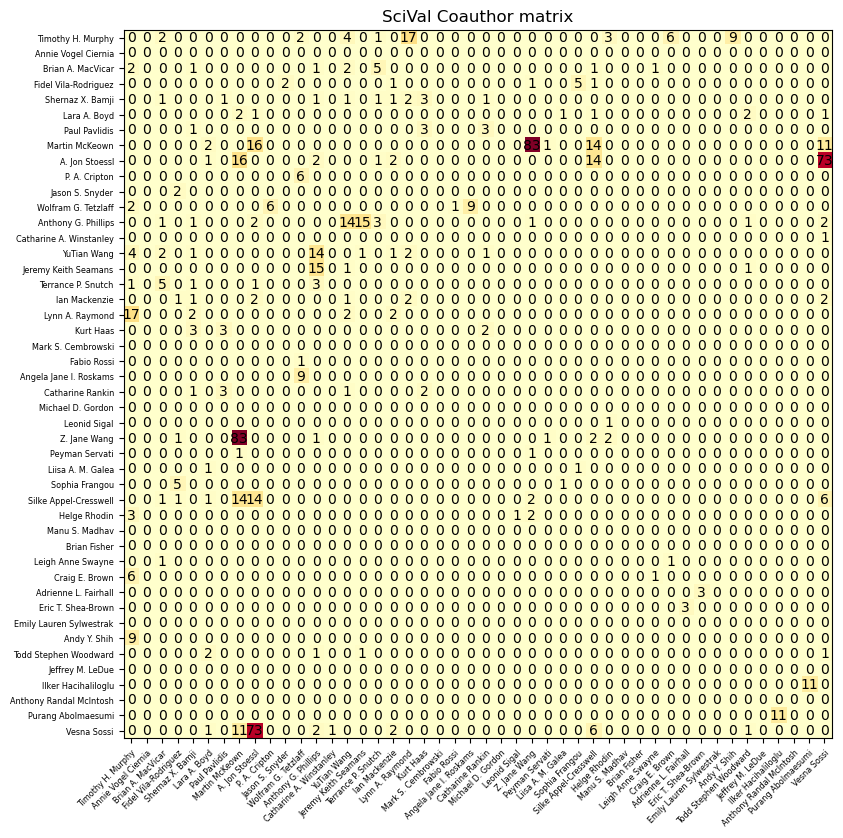

In [17]:
graph_matrix(scival_df, "SciVal Coauthor matrix")

In [18]:
scival_centrality = bct.betweenness_bin(scival_coauthor_matrix)
scival_centrality_normed = scival_centrality/((len(scival_coauthor_matrix)-1)*(len(scival_coauthor_matrix)-2))

['Timothy H. Murphy', 'Annie Vogel Ciernia', 'Brian A. MacVicar', 'Fidel Vila-Rodriguez', 'Shernaz X. Bamji', 'Lara A. Boyd', 'Paul Pavlidis', 'Martin McKeown', 'A. Jon Stoessl', 'P. A. Cripton', 'Jason S. Snyder', 'Wolfram G. Tetzlaff', 'Anthony G. Phillips', 'Catharine A. Winstanley', 'YuTian Wang', 'Jeremy Keith Seamans', 'Terrance P. Snutch', 'Ian Mackenzie', 'Lynn A. Raymond', 'Kurt Haas', 'Mark S. Cembrowski', 'Fabio Rossi', 'Angela Jane I. Roskams', 'Catharine Rankin', 'Michael D. Gordon', 'Leonid Sigal', 'Z. Jane Wang', 'Peyman Servati', 'Liisa A. M. Galea', 'Sophia Frangou', 'Silke Appel-Cresswell', 'Helge Rhodin', 'Manu S. Madhav', 'Brian Fisher', 'Leigh Anne Swayne', 'Craig E. Brown', 'Adrienne L. Fairhall', 'Eric T. Shea-Brown', 'Emily Lauren Sylwestrak', 'Andy Y. Shih', 'Todd Stephen Woodward', 'Jeffrey M. LeDue', 'Ilker Hacihaliloglu', 'Anthony Randal McIntosh', 'Purang Abolmaesumi', 'Vesna Sossi']


([<matplotlib.axis.XTick at 0x29cfb334610>,
 [Text(0, 0, 'Timothy H. Murphy'),
  Text(1, 0, 'Annie Vogel Ciernia'),
  Text(2, 0, 'Brian A. MacVicar'),
  Text(3, 0, 'Fidel Vila-Rodriguez'),
  Text(4, 0, 'Shernaz X. Bamji'),
  Text(5, 0, 'Lara A. Boyd'),
  Text(6, 0, 'Paul Pavlidis'),
  Text(7, 0, 'Martin McKeown'),
  Text(8, 0, 'A. Jon Stoessl'),
  Text(9, 0, 'P. A. Cripton'),
  Text(10, 0, 'Jason S. Snyder'),
  Text(11, 0, 'Wolfram G. Tetzlaff'),
  Text(12, 0, 'Anthony G. Phillips'),
  Text(13, 0, 'Catharine A. Winstanley'),
  Text(14, 0, 'YuTian Wang'),
  Text(15, 0, 'Jeremy Keith Seamans'),
  Text(16, 0, 'Terrance P. Snutch'),
  Text(17, 0, 'Ian Mackenzie'),
  Text(18, 0, 'Lynn A. Raymond'),
  Text(19, 0, 'Kurt Haas'),
  Text(20, 0, 'Mark S. Cembrowski'),
  Text(21, 0, 'Fabio Rossi'),
  Text(22, 0, 'Angela Jane I. Roskams'),
  Text(23, 0, 'Catharine Rankin'),
  Text(24, 0, 'Michael D. Gordon'),
  Text(25, 0, 'Leonid Sigal'),
  Text(26, 0, 'Z. Jane Wang'),
  Text(27, 0, 'Peyman Servat

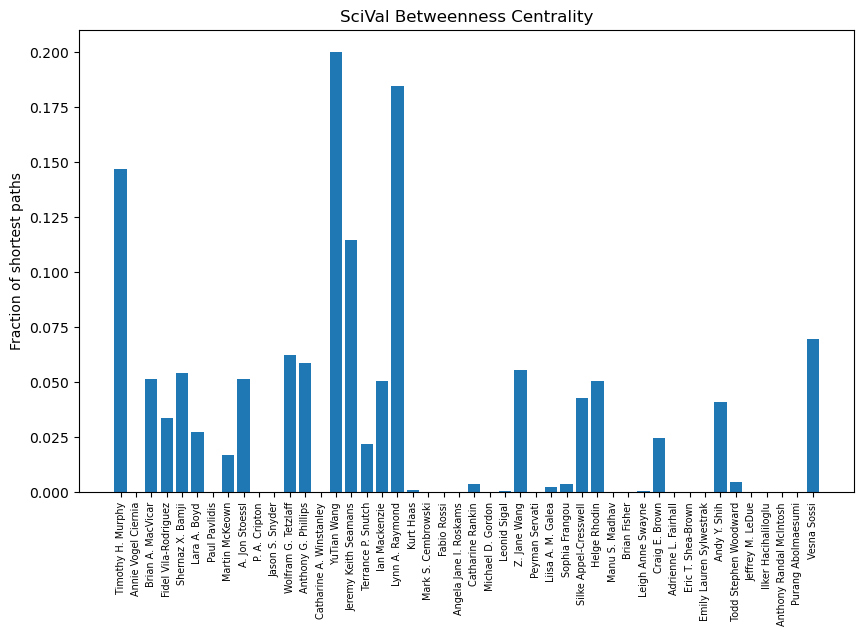

In [25]:
plt.figure(figsize=(10,6))
names = scival_df["Name"].to_list()
print(names)
plt.bar(names, scival_centrality_normed)
plt.title("SciVal Betweenness Centrality")
plt.ylabel("Fraction of shortest paths")
plt.xticks(range(len(names)), labels=names, rotation=90, fontsize='x-small')

In [26]:
gs_centrality = bct.betweenness_bin(gs_coauthor_matrix)
gs_centrality_normed = gs_centrality/((len(gs_coauthor_matrix)-1)*(len(gs_coauthor_matrix)-2))

scival_centrality = bct.betweenness_bin(scival_coauthor_matrix)
scival_centrality_normed = scival_centrality/((len(scival_coauthor_matrix)-1)*(len(scival_coauthor_matrix)-2))

([<matplotlib.axis.XTick at 0x29cfb459750>,
 [Text(0, 0, 'Timothy H. Murphy'),
  Text(1, 0, 'Annie Vogel Ciernia'),
  Text(2, 0, 'Brian A. MacVicar'),
  Text(3, 0, 'Fidel Vila-Rodriguez'),
  Text(4, 0, 'Shernaz X. Bamji'),
  Text(5, 0, 'Lara A. Boyd'),
  Text(6, 0, 'Paul Pavlidis'),
  Text(7, 0, 'Martin McKeown'),
  Text(8, 0, 'A. Jon Stoessl'),
  Text(9, 0, 'P. A. Cripton'),
  Text(10, 0, 'Jason S. Snyder'),
  Text(11, 0, 'Wolfram G. Tetzlaff'),
  Text(12, 0, 'Anthony G. Phillips'),
  Text(13, 0, 'Catharine A. Winstanley'),
  Text(14, 0, 'YuTian Wang'),
  Text(15, 0, 'Jeremy Keith Seamans'),
  Text(16, 0, 'Terrance P. Snutch'),
  Text(17, 0, 'Ian Mackenzie'),
  Text(18, 0, 'Lynn A. Raymond'),
  Text(19, 0, 'Kurt Haas'),
  Text(20, 0, 'Mark S. Cembrowski'),
  Text(21, 0, 'Fabio Rossi'),
  Text(22, 0, 'Angela Jane I. Roskams'),
  Text(23, 0, 'Catharine Rankin'),
  Text(24, 0, 'Michael D. Gordon'),
  Text(25, 0, 'Leonid Sigal'),
  Text(26, 0, 'Z. Jane Wang'),
  Text(27, 0, 'Peyman Servat

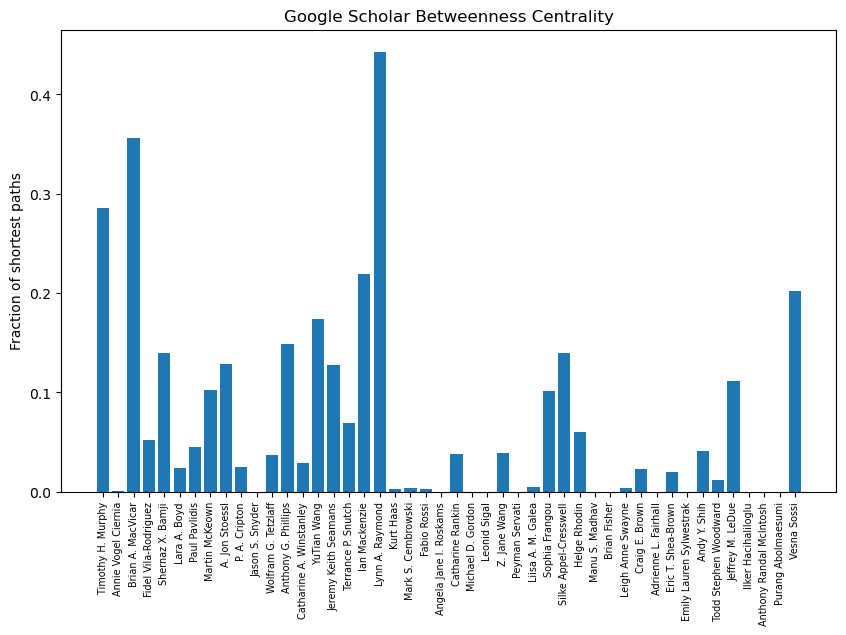

In [27]:
plt.figure(figsize=(10,6))
gs_names = gs_df["Name"].to_list()
plt.bar(names, gs_centrality_normed)
plt.title("Google Scholar Betweenness Centrality")
plt.ylabel("Fraction of shortest paths")
plt.xticks(range(len(gs_names)), labels=names, rotation=90, fontsize='x-small')

In [28]:
centrality_df = pd.DataFrame({
    "Name":names,
    "SciVal":scival_centrality_normed,
    "Google Scholar":gs_centrality_normed,
})

ordered_df = centrality_df.sort_values(by="Google Scholar", ascending=True)
print(ordered_df.head)

<bound method NDFrame.head of                        Name    SciVal  Google Scholar
22   Angela Jane I. Roskams  0.000000        0.000000
43  Anthony Randal McIntosh  0.000000        0.000000
38  Emily Lauren Sylwestrak  0.000000        0.000000
36     Adrienne L. Fairhall  0.000000        0.000000
33             Brian Fisher  0.000000        0.000000
32           Manu S. Madhav  0.000000        0.000000
27           Peyman Servati  0.000000        0.000000
25             Leonid Sigal  0.000505        0.000000
24        Michael D. Gordon  0.000000        0.000000
10          Jason S. Snyder  0.000000        0.000000
44       Purang Abolmaesumi  0.000000        0.000000
42      Ilker Hacihaliloglu  0.000000        0.000000
1       Annie Vogel Ciernia  0.000000        0.000884
21              Fabio Rossi  0.000000        0.002475
19                Kurt Haas  0.001010        0.002525
20       Mark S. Cembrowski  0.000000        0.003367
34        Leigh Anne Swayne  0.000303        0.00392

[0.1468886  0.         0.05122206 0.03362353 0.05395745 0.02709585
 0.         0.01677088 0.05110676 0.         0.         0.06212121
 0.05876375 0.         0.2001916  0.11433784 0.02170611 0.05048414
 0.1847666  0.0010101  0.         0.         0.         0.00333006
 0.         0.00050505 0.05526904 0.         0.00211875 0.003757
 0.04267674 0.05031569 0.         0.         0.0003029  0.0245892
 0.         0.         0.         0.04090909 0.00466483 0.
 0.         0.         0.         0.06950388]
[0.28523701 0.00088384 0.35656575 0.05205202 0.1397387  0.02398398
 0.04532359 0.1028747  0.12836853 0.02520368 0.         0.03671876
 0.14879885 0.02888115 0.17406626 0.1272068  0.0693182  0.21974203
 0.44299535 0.00252525 0.003367   0.00247477 0.         0.03773191
 0.         0.         0.03900179 0.         0.00436104 0.10122342
 0.13980038 0.0601606  0.         0.         0.00392099 0.02321134
 0.         0.01969697 0.         0.04090909 0.01136277 0.11131257
 0.         0.         0.  

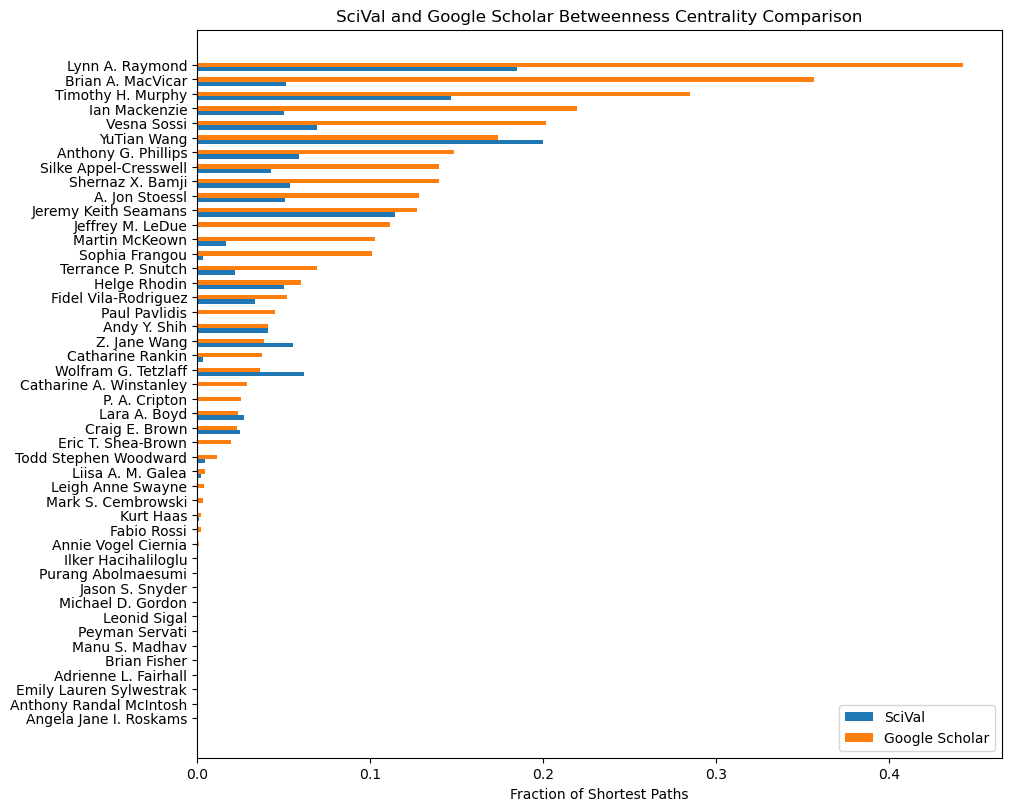

In [29]:
species = ordered_df["Name"].to_list()
penguin_means = {
    'SciVal': ordered_df["SciVal"].to_list(),
    'Google Scholar': ordered_df["Google Scholar"].to_list(),
}

print(scival_centrality_normed)
print(gs_centrality_normed)

x = np.arange(len(species))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

fig.set_size_inches(10, 8)
plt.title("Google Scholar Betweenness Centrality")

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.barh(x + offset, measurement, width, label=attribute)
    # if attribute=="Scival":
    #     ax.bar_label(rects, padding=3, color = "blue")
    # elif attribute=="Google Scholar":
    #     ax.bar_label(rects, padding=3, color = "orange")
    multiplier += 1

ax.set_xlabel("Fraction of Shortest Paths")
ax.set_title('SciVal and Google Scholar Betweenness Centrality Comparison')
ax.set_yticks(x + width, labels=species)
ax.legend(loc='lower right')